In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.isna().any().any()

True

In [6]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
data.shape

(569, 32)

In [9]:
data.drop('id', axis=1, inplace=True)

In [10]:
data.shape

(569, 31)

In [11]:
data.isna().any().any()

False

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
def report(model, x, y, text='train'):
    print(f'{text}\t | \t {type(model).__name__}')
    print('-'*80)
    y_pred = model.predict(x)
    print(classification_report(y, y_pred))
    print('-'*80)
    print(pd.DataFrame(confusion_matrix(y, y_pred), index=['B', 'M'], columns=['B', 'M']))

In [15]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

In [16]:
feature_names = X.columns

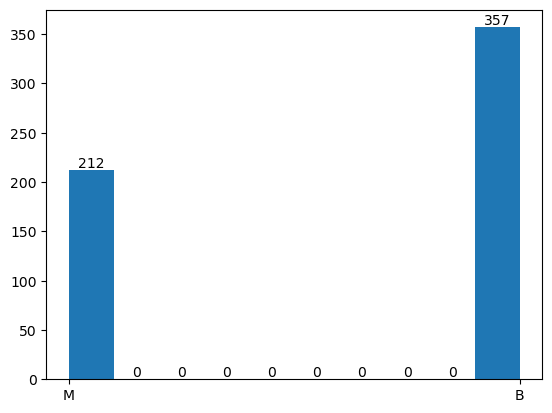

In [17]:
edges, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [18]:
# poprilicno dobro izbalansirani podaci 

In [19]:
# 0 -> kodiramo nesto sto je normalno
# 1 -> kodiramo nesto sto je abnormalno

In [20]:
Y.replace('B', 0, inplace=True)

In [21]:
Y.replace('M', 1, inplace=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
report(model, X_train, y_train)

train	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [26]:
report(model, X_test, y_test, 'test')

test	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        90
           1       0.94      0.89      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

--------------------------------------------------------------------------------
    B   M
B  87   3
M   6  47


In [27]:
from sklearn.tree import plot_tree

In [28]:
def treePlot(model, feature_names, class_names):
    plt.figure(figsize=(10,10))
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

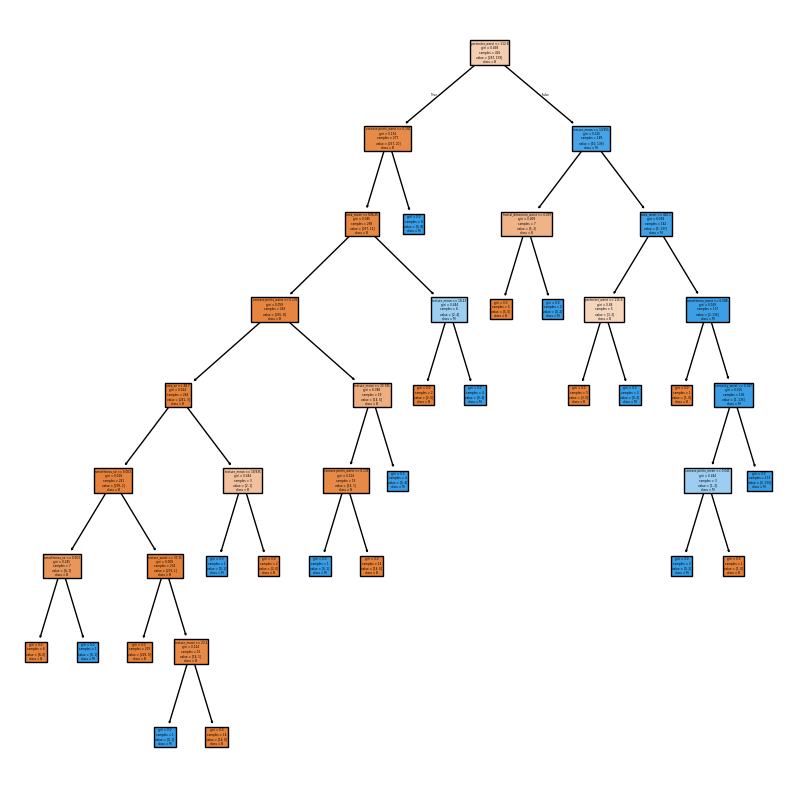

In [29]:
treePlot(model, feature_names, ['B', 'M'])

In [30]:
model.get_depth()

8

In [31]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [32]:
params = {
    'max_depth': [2,4,6,8],
    'criterion': ['gini', 'entropy']
}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, verbose=5)

In [35]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.907 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.976 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.918 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.906 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.859 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.930 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.976 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.918 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.906 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.882 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.919 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=6;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             verbose=5)

In [36]:
estimator.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
model = estimator.best_estimator_

In [38]:
report(model, X_train, y_train)

train	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       1.00      0.94      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    9  150


In [39]:
report(model, X_test, y_test, 'test')

test	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        90
           1       0.96      0.81      0.88        53

    accuracy                           0.92       143
   macro avg       0.93      0.89      0.91       143
weighted avg       0.92      0.92      0.91       143

--------------------------------------------------------------------------------
    B   M
B  88   2
M  10  43


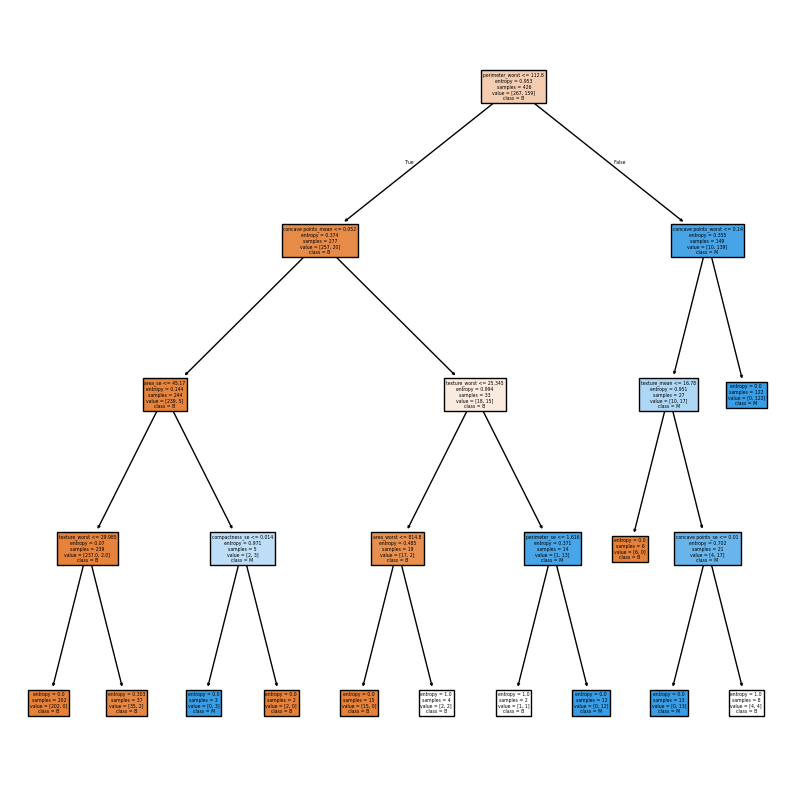

In [40]:
treePlot(model, feature_names, ['B', 'M'])

In [41]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
report(model, X_train, y_train)

train	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------------------------------------
     B    M
B  266    1
M    8  151


In [44]:
report(model, X_test, y_test, 'test')

test	 | 	 DecisionTreeClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        90
           1       0.97      0.74      0.84        53

    accuracy                           0.90       143
   macro avg       0.92      0.86      0.88       143
weighted avg       0.91      0.90      0.89       143

--------------------------------------------------------------------------------
    B   M
B  89   1
M  14  39


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
forest = RandomForestClassifier(max_depth=6, criterion='entropy', verbose=5)

In [47]:
forest.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s


RandomForestClassifier(criterion='entropy', max_depth=6, verbose=5)

In [48]:
report(forest, X_train, y_train)

train	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       267
           1       1.00      0.99      0.99       159

    accuracy                           1.00       426
   macro avg       1.00      0.99      0.99       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    2  157


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


In [49]:
report(forest, X_test, y_test, 'test')

test	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

--------------------------------------------------------------------------------
    B   M
B  90   0
M   5  48


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


In [51]:
estimator = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, verbose=5)

In [52]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.953 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.965 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.941 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.941 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.941 total time=   0.1s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.977 total time=   0.1s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.976 total time=   0.1s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.953 total time=   0.1s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.976 total time=   0.1s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.929 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.953 total time=   0.2s
[CV 2/5] END .......criterion=gini, max_depth=6;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             verbose=5)

In [54]:
estimator.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
forest = estimator.best_estimator_

In [56]:
report(forest, X_train, y_train)

train	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

--------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [57]:
report(forest, X_test, y_test, 'test')

test	 | 	 RandomForestClassifier
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

--------------------------------------------------------------------------------
    B   M
B  90   0
M   5  48


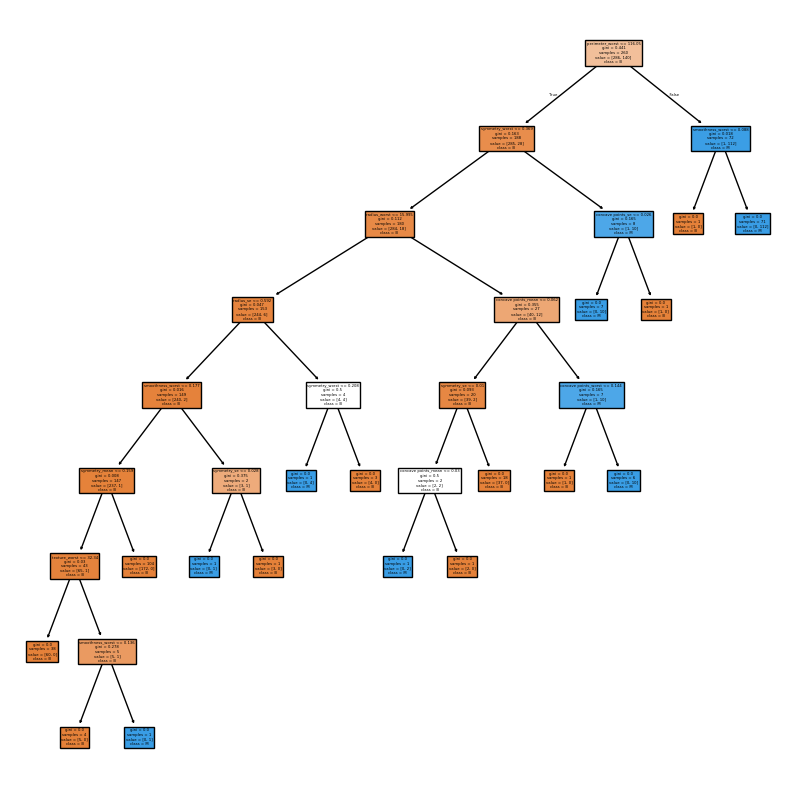

In [59]:
treePlot(forest.estimators_[0], feature_names, ['B', 'M'])